# <FGSM 적용하기></FGSM>

# **Dependacies**

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
import os
import random

# **Importing Training Data**

In [2]:
ClassNames = ['Aircraft Carrier', 'Bulkers', 'Car Carrier', 'Container Ship', 'Cruise', 'DDG', 'Recreational', 'Sailboat', 'Submarine', 'Tug']

## 파일을 불러오는데 경로를 체크해야함

In [3]:
import os
print(os.getcwd())

c:\dev\workspace\ai_sec\Asia_Arrived_La\SON


### 위 코드를 사용하면 c:\dev\workspace\ai_sec\Asia_Arrived_La\SON 본인은 이렇게 나옴 각자 자신의 폴더 위치에 따라 다르겠지만
 
### c:\dev\workspace\ai_sec\Asia_Arrived_La\ 해당 부분을 아래 기본 경로 정의에 적어주면 된다. 자기의 폴더 구조에 따라 다를 것이다.

In [4]:
Base_Path = r'c:\dev\workspace\ai_sec\Asia_Arrived_La' ## --------> 해당 부분임

In [5]:
import os
import cv2
import numpy as np

# 기본 경로 정의
base_path = Base_Path  ## --------> 해당 부분임

# 기본 경로를 기준으로 이미지와 라벨 경로 정의
data_image = os.path.join(base_path, 'Data', 'Ships_dataset', 'train', 'images')
data_label = os.path.join(base_path, 'Data', 'Ships_dataset', 'train', 'labels')

# 절대 경로로 변환
pathi = os.path.abspath(data_image)
pathl = os.path.abspath(data_label)

# 경로를 확인하기 위해 출력
print("이미지 경로:", pathi)
print("라벨 경로:", pathl)

traindata = []


for file in os.listdir(pathi):
    file_p  = os.path.join(pathi, file)
    image = cv2.imread(file_p)
    image = np.array(image)
    image=cv2.resize(image, (64,64),interpolation=cv2.INTER_LINEAR)
    traindata.append(image) 

이미지 경로: c:\dev\workspace\ai_sec\Asia_Arrived_La\Data\Ships_dataset\train\images
라벨 경로: c:\dev\workspace\ai_sec\Asia_Arrived_La\Data\Ships_dataset\train\labels


In [6]:
trainlabel = []
for file in os.listdir(pathl):
    file_p  = os.path.join(pathl, file)
    f = open(file_p, "r")
    a = int(f.read(1))
    trainlabel.append(a)

In [7]:
data = []
for i in range(0,len(trainlabel)):
    traindata[i] = traindata[i]/255
    data.append((traindata[i], trainlabel[i]))

random.shuffle(data)
images, labels =  [], []
for a, b in data:
    images.append(a)
    labels.append(b)
    


# **Visualize the Data**

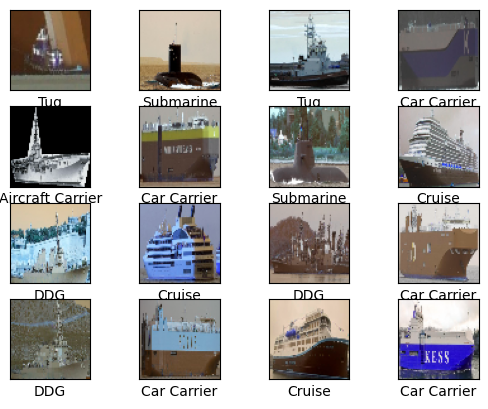

In [8]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i],cmap=plt.cm.binary)
    plt.xlabel(ClassNames[labels[i]])
plt.show()

# **Importing Validation Data**

In [9]:
import os
import cv2
import numpy as np

# 기본 경로 정의
base_path = Base_Path

# 기본 경로를 기준으로 이미지와 라벨 경로 정의
data_image = os.path.join(base_path, 'Data', 'Ships_dataset', 'valid', 'images')
data_label = os.path.join(base_path, 'Data', 'Ships_dataset', 'valid', 'labels')

# 절대 경로로 변환
pathi = os.path.abspath(data_image)
pathl = os.path.abspath(data_label)

# 경로를 확인하기 위해 출력
print("이미지 경로:", pathi)
print("라벨 경로:", pathl)


validdata = []


for file in os.listdir(pathi):
    file_p  = os.path.join(pathi, file)
    image = cv2.imread(file_p)
    image = np.array(image)
    image=cv2.resize(image, (64,64),interpolation=cv2.INTER_LINEAR)
    validdata.append(image)
    
validlabel = []
for file in os.listdir(pathl):
    file_p  = os.path.join(pathl, file)
    f = open(file_p, "r")
    a = int(f.read(1))
    validlabel.append(a)
    
validation = []
for i in range(0,len(validlabel)):
    validdata[i] = validdata[i]/255
    validation.append((validdata[i], validlabel[i]))

random.shuffle(validation)
validationimages, validationlabels =  [], []
for a, b in validation:
    validationimages.append(a)
    validationlabels.append(b)

이미지 경로: c:\dev\workspace\ai_sec\Asia_Arrived_La\Data\Ships_dataset\valid\images
라벨 경로: c:\dev\workspace\ai_sec\Asia_Arrived_La\Data\Ships_dataset\valid\labels


In [10]:
images = np.array(images)
labels = np.array(labels)
validationimages = np.array(validationimages)
validationlabels = np.array(validationlabels)

# **Model**

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# **Training the Model**

In [12]:
model.fit(images,labels,batch_size = 32,epochs=1,validation_data=(validationimages,validationlabels))

loss, accuracy = model.evaluate(images,labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

232/232 [==============================] - 18s 75ms/step - loss: 0.6251 - accuracy: 0.7896
Loss: 0.6251100301742554
Accuracy: 0.7896300554275513


# **Exporing the Model**

In [13]:
model.save('ShipClassifierV1.h5')

# **Loading the model**

In [14]:
model = models.load_model('ShipClassifierV1.h5')

# **Importing testing Data**

In [15]:
import os
import cv2
import numpy as np

# 기본 경로 정의
base_path = Base_Path

# 기본 경로를 기준으로 이미지와 라벨 경로 정의
data_image = os.path.join(base_path, 'Data', 'Ships_dataset', 'test', 'images')
data_label = os.path.join(base_path, 'Data', 'Ships_dataset', 'test', 'labels')

# 절대 경로로 변환
pathi = os.path.abspath(data_image)
pathl = os.path.abspath(data_label)

# 경로를 확인하기 위해 출력
print("이미지 경로:", pathi)
print("라벨 경로:", pathl)


testdata = []


for file in os.listdir(pathi):
    file_p  = os.path.join(pathi, file)
    image = cv2.imread(file_p)
    image = np.array(image)
    image=cv2.resize(image, (64,64),interpolation=cv2.INTER_LINEAR)
    testdata.append(image)
    
testlabel = []
for file in os.listdir(pathl):
    file_p  = os.path.join(pathl, file)
    f = open(file_p, "r")
    a = int(f.read(1))
    testlabel.append(a)
    
testing = []
for i in range(0,len(testlabel)):
    testdata[i] = testdata[i]/255
    testing.append((testdata[i], testlabel[i]))

random.shuffle(testing)
testingimages, testinglabels =  [], []
for a, b in testing:
    testingimages.append(a)
    testinglabels.append(b)
    
testinglabels = np.array(testinglabels)
testingimages = np.array(testingimages)

이미지 경로: c:\dev\workspace\ai_sec\Asia_Arrived_La\Data\Ships_dataset\test\images
라벨 경로: c:\dev\workspace\ai_sec\Asia_Arrived_La\Data\Ships_dataset\test\labels


# **Testing the model**

In [16]:
loss, accuracy = model.evaluate(testingimages,testinglabels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

12/12 [==============================] - 1s 64ms/step - loss: 0.8025 - accuracy: 0.7585
Loss: 0.8024657964706421
Accuracy: 0.7585301995277405


1/1 [==============================] - 0s 44ms/step


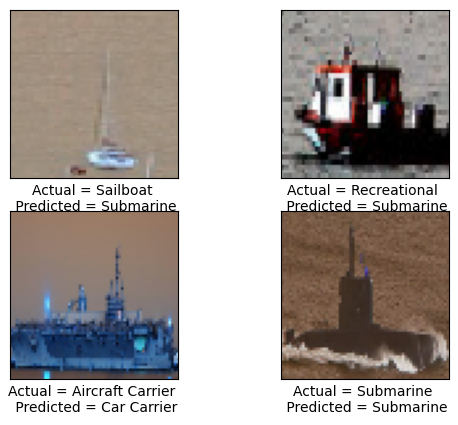

In [17]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(testingimages[i],cmap=plt.cm.binary)
    pred = model.predict(np.array([testingimages[i]]))
    index = np.argmax(pred)
    plt.xlabel(f"Actual = {ClassNames[testinglabels[i]]} \n Predicted = {ClassNames[index]}")
    
plt.show()

## 적대적 예제 생성하는 코드

## 0. FGSM

In [20]:
# import the necessary packages
from tensorflow.keras.losses import MSE
import tensorflow as tf
import numpy as np



# 적대적 예제 생성 함수
def generate_image_adversary(model, image, label, eps=2 / 255.0):
    image = tf.cast(image, tf.float32)
    with tf.GradientTape() as tape:
        tape.watch(image)
        pred = model(image)
        loss = MSE(label, pred)
        gradient = tape.gradient(loss, image)
        signedGrad = tf.sign(gradient)
        adversary = (image + (signedGrad * eps)).numpy()
        return adversary
        ## return 적대적 이미지 



# 원본 테스트 데이터에서 모델의 손실과 정확도 평가
loss, accuracy = model.evaluate(testingimages, testinglabels)
print(f"원본 테스트 데이터에서의 손실: {loss}")
print(f"원본 테스트 데이터에서의 정확도: {accuracy}")



# 적대적 예제를 저장할 리스트
adversarial_examples = []



# 테스트 이미지에 대해 적대적 예제 생성
for i in range(len(testingimages)):
    image = testingimages[i]
    label = testinglabels[i]
    adversary = generate_image_adversary(model, image.reshape(1, 64, 64, 3), label, eps=0.1)
    adversarial_examples.append(adversary)


# 적대적 예제를 numpy 배열로 변환
adversarial_examples = np.vstack(adversarial_examples)



# 적대적 예제를 사용하여 모델의 손실과 정확도 평가
adversarial_loss, adversarial_accuracy = model.evaluate(adversarial_examples, testinglabels)
print(f"적대적 테스트 데이터에서의 손실: {adversarial_loss}")
print(f"적대적 테스트 데이터에서의 정확도: {adversarial_accuracy}")

12/12 [==============================] - 1s 50ms/step - loss: 0.8025 - accuracy: 0.7585
원본 테스트 데이터에서의 손실: 0.8024657964706421
원본 테스트 데이터에서의 정확도: 0.7585301995277405
12/12 [==============================] - 1s 50ms/step - loss: 2.0333 - accuracy: 0.7218
적대적 테스트 데이터에서의 손실: 2.0333151817321777
적대적 테스트 데이터에서의 정확도: 0.721784770488739


## 1. BIM (Basic Iterative Method)

### BIM은 FGSM의 반복 버전입니다. 여러 단계에 걸쳐 작은 업데이트를 적용하여 더 강력한 공격을 생성

In [ ]:
def generate_image_bim(model, image, label, eps=2 / 255.0, alpha=0.01, iterations=10):
    image = tf.cast(image, tf.float32)
    original_image = image
    for i in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(image)
            pred = model(image)
            loss = MSE(label, pred)
        gradient = tape.gradient(loss, image)
        signedGrad = tf.sign(gradient)
        image = image + alpha * signedGrad
        # 클리핑을 통해 이미지 값이 원래 범위를 넘지 않도록 보장
        image = tf.clip_by_value(image, original_image - eps, original_image + eps)
        image = tf.clip_by_value(image, 0, 1)  # 이미지 값이 0과 1 사이에 있도록 보장
    adversary = image.numpy()
    return adversary


# 원본 테스트 데이터에서 모델의 손실과 정확도 평가
loss, accuracy = model.evaluate(testingimages, testinglabels)
print(f"원본 테스트 데이터에서의 손실: {loss}")
print(f"원본 테스트 데이터에서의 정확도: {accuracy}")

# 적대적 예제를 저장할 리스트
bim_adversarial_examples = []


# 테스트 이미지에 대해 BIM 적대적 예제 생성
for i in range(len(testingimages)):
    image = testingimages[i]
    label = testinglabels[i]
    bim_adversary = generate_image_bim(model, image.reshape(1, 64, 64, 3), label, eps=0.1, alpha=0.01, iterations=10)
    bim_adversarial_examples.append(bim_adversary)




# 적대적 예제를 numpy 배열로 변환
bim_adversarial_examples = np.vstack(bim_adversarial_examples)



# BIM 적대적 예제를 사용하여 모델의 손실과 정확도 평가
bim_loss, bim_accuracy = model.evaluate(bim_adversarial_examples, testinglabels)
print(f"BIM 적대적 테스트 데이터에서의 손실: {bim_loss}")
print(f"BIM 적대적 테스트 데이터에서의 정확도: {bim_accuracy}")


## 2. PGD (Projected Gradient Descent)

### PGD는 BIM과 유사하지만 랜덤 초기화가 추가된 형태입니다. 이는 보다 강력한 공격을 생성합니다.

In [ ]:
def generate_image_pgd(model, image, label, eps=2 / 255.0, alpha=0.01, iterations=10):
    image = tf.cast(image, tf.float32)
    original_image = image
    perturbation = tf.random.uniform(image.shape, -eps, eps, dtype=tf.float32)
    image = image + perturbation
    for i in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(image)
            pred = model(image)
            loss = MSE(label, pred)
        gradient = tape.gradient(loss, image)
        signedGrad = tf.sign(gradient)
        image = image + alpha * signedGrad
        # 클리핑을 통해 이미지 값이 원래 범위를 넘지 않도록 보장
        image = tf.clip_by_value(image, original_image - eps, original_image + eps)
        image = tf.clip_by_value(image, 0, 1)  # 이미지 값이 0과 1 사이에 있도록 보장
    adversary = image.numpy()
    return adversary




# 원본 테스트 데이터에서 모델의 손실과 정확도 평가
loss, accuracy = model.evaluate(testingimages, testinglabels)
print(f"원본 테스트 데이터에서의 손실: {loss}")
print(f"원본 테스트 데이터에서의 정확도: {accuracy}")


pgd_adversarial_examples = []


# 테스트 이미지에 대해 PGD 적대적 예제 생성
for i in range(len(testingimages)):
    image = testingimages[i]
    label = testinglabels[i]
    pgd_adversary = generate_image_pgd(model, image.reshape(1, 64, 64, 3), label, eps=0.1, alpha=0.01, iterations=10)
    pgd_adversarial_examples.append(pgd_adversary)


pgd_adversarial_examples = np.vstack(pgd_adversarial_examples)


# PGD 적대적 예제를 사용하여 모델의 손실과 정확도 평가
pgd_loss, pgd_accuracy = model.evaluate(pgd_adversarial_examples, testinglabels)
print(f"PGD 적대적 테스트 데이터에서의 손실: {pgd_loss}")
print(f"PGD 적대적 테스트 데이터에서의 정확도: {pgd_accuracy}")

## 3. DeepFool

### DeepFool은 모델의 결정 경계를 넘어서게 하는 최소한의 교란을 찾는 방식으로 작동

In [24]:
def generate_image_deepfool(model, image, max_iter=50):
    image = tf.cast(image, tf.float32)
    input_shape = image.shape
    pert_image = image
    for _ in range(max_iter):
        with tf.GradientTape() as tape:
            tape.watch(pert_image)
            pred = model(pert_image)
            loss = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(labels=tf.one_hot(tf.argmax(pred, 1), 10), logits=pred))
        gradient = tape.gradient(loss, pert_image)
        gradient = gradient / tf.norm(gradient)
        pert_image = pert_image + gradient
        pert_image = tf.clip_by_value(pert_image, 0, 1)
    return pert_image.numpy()



# 원본 테스트 데이터에서 모델의 손실과 정확도 평가
loss, accuracy = model.evaluate(testingimages, testinglabels)
print(f"원본 테스트 데이터에서의 손실: {loss}")
print(f"원본 테스트 데이터에서의 정확도: {accuracy}")



deepfool_adversarial_examples = []


# 테스트 이미지에 대해 DEEPFOOL 적대적 예제 생성
for i in range(len(testingimages)):
    image = testingimages[i]
    label = testinglabels[i]
    deepfool_adversary = generate_image_deepfool(model, image.reshape(1, 64, 64, 3))
    deepfool_adversarial_examples.append(deepfool_adversary)


deepfool_adversarial_examples = np.vstack(deepfool_adversarial_examples)


# DEEPFOOL 적대적 예제를 사용하여 모델의 손실과 정확도 평가
deepfool_loss, deepfool_accuracy = model.evaluate(deepfool_adversarial_examples, testinglabels)
print(f"DEEPFOOL 적대적 테스트 데이터에서의 손실: {deepfool_loss}")
print(f"DEEPFOOL 적대적 테스트 데이터에서의 정확도: {deepfool_accuracy}")


12/12 [==============================] - 1s 70ms/step - loss: 0.8025 - accuracy: 0.7585
원본 테스트 데이터에서의 손실: 0.8024657964706421
원본 테스트 데이터에서의 정확도: 0.7585301995277405
12/12 [==============================] - 1s 65ms/step - loss: 2.1425 - accuracy: 0.1496
DEEPFOOL 적대적 테스트 데이터에서의 손실: 2.142496347427368
DEEPFOOL 적대적 테스트 데이터에서의 정확도: 0.14960630238056183


## 4. Carlini & Wagner (C&W) 공격

### C&W 공격은 L2, L∞, L0 노름을 사용하여 강력한 적대적 예제를 생성합니다. 여기서는 L2 노름을 사용하는 예

In [25]:
def generate_image_cw(model, image, label, confidence=0, learning_rate=0.01, max_iter=1000, binary_search_steps=10):
    image = tf.cast(image, tf.float32)
    adv_image = tf.Variable(image)
    optimizer = tf.optimizers.Adam(learning_rate)
    target_label = tf.one_hot(label, 10)
    
    for _ in range(binary_search_steps):
        for _ in range(max_iter):
            with tf.GradientTape() as tape:
                pred = model(adv_image)
                loss = tf.nn.softmax_cross_entropy_with_logits(labels=target_label, logits=pred)
                l2dist = tf.reduce_sum(tf.square(adv_image - image))
                total_loss = loss + l2dist
            gradient = tape.gradient(total_loss, adv_image)
            optimizer.apply_gradients([(gradient, adv_image)])
            adv_image.assign(tf.clip_by_value(adv_image, 0, 1))
    return adv_image.numpy()




# 원본 테스트 데이터에서 모델의 손실과 정확도 평가
loss, accuracy = model.evaluate(testingimages, testinglabels)
print(f"원본 테스트 데이터에서의 손실: {loss}")
print(f"원본 테스트 데이터에서의 정확도: {accuracy}")



cw_adversarial_examples = []


# 테스트 이미지에 대해 CW 적대적 예제 생성
for i in range(len(testingimages)):
    image = testingimages[i]
    label = testinglabels[i]
    cw_adversary = generate_image_cw(model, image.reshape(1, 64, 64, 3), label.argmax())
    cw_adversarial_examples.append(cw_adversary)


cw_adversarial_examples = np.vstack(cw_adversarial_examples)


# CW 적대적 예제를 사용하여 모델의 손실과 정확도 평가
cw_loss, cw_accuracy = model.evaluate(cw_adversarial_examples, testinglabels)
print(f"CW 적대적 테스트 데이터에서의 손실: {cw_loss}")
print(f"CW 적대적 테스트 데이터에서의 정확도: {cw_accuracy}")


12/12 [==============================] - 1s 56ms/step - loss: 0.8025 - accuracy: 0.7585
원본 테스트 데이터에서의 손실: 0.8024657964706421
원본 테스트 데이터에서의 정확도: 0.7585301995277405


KeyboardInterrupt: 

## 5. Momentum Iterative Method (MIM)

### MIM은 FGSM의 반복적인 버전으로, 모멘텀을 추가하여 더 강력한 공격생성

In [ ]:
def generate_image_mim(model, image, label, eps=2 / 255.0, alpha=0.01, iterations=10, decay_factor=1.0):
    image = tf.cast(image, tf.float32)
    g = 0
    for i in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(image)
            pred = model(image)
            loss = MSE(label, pred)
        gradient = tape.gradient(loss, image)
        g = decay_factor * g + gradient / tf.norm(gradient, ord=1)
        image = image + alpha * tf.sign(g)
        image = tf.clip_by_value(image, 0, 1)
    return image.numpy()




# 원본 테스트 데이터에서 모델의 손실과 정확도 평가
loss, accuracy = model.evaluate(testingimages, testinglabels)
print(f"원본 테스트 데이터에서의 손실: {loss}")
print(f"원본 테스트 데이터에서의 정확도: {accuracy}")



mim_adversarial_examples = []


# 테스트 이미지에 대해 MIM 적대적 예제 생성
for i in range(len(testingimages)):
    image = testingimages[i]
    label = testinglabels[i]
    mim_adversary = generate_image_mim(model, image.reshape(1, 64, 64, 3), label, eps=0.1, alpha=0.01, iterations=10)
    mim_adversarial_examples.append(mim_adversary)


mim_adversarial_examples = np.vstack(mim_adversarial_examples)


# MIM 적대적 예제를 사용하여 모델의 손실과 정확도 평가
mim_loss, mim_accuracy = model.evaluate(mim_adversarial_examples, testinglabels)
print(f"MIM 적대적 테스트 데이터에서의 손실: {mim_loss}")
print(f"MIM 적대적 테스트 데이터에서의 정확도: {mim_accuracy}")